In [3]:
import pandas as pd
import numpy as np
from sympy import symbols
from sympy.plotting import plot 
import matplotlib.pyplot as plt

# Criando a Classe 

In [4]:
class Perceptron():
    
    def __init__(self, x1, x2, x3):
        
        self.w = [x1,x2,x3]
        
    def model(self, x): ## X is a data with len = 3
        
        return np.sign((np.dot(self.w,x)))
    
    def ajuste(self, X, Y):
        
        for i in range(len(X)):
            
            if self.model(X[i]) != Y[i]:
                
                for j in range(len(X[i])):

                    self.w[j] = self.w[j] + X[i][j]*Y[i]
#                     print("ajuste no {}".format(i))
#                 print("{} ajustado".format(i))
                
        return self.w
    
    def accuracy(self, X, Y):

        count = 0
        
        for i in range(len(X)):
            
            if self.model(X[i]) == Y[i]:
                count += 1
        
        acc = count/len(X)
        count = 0
        return acc
    
    def train(self, X, Y, epochs):
        
        G = []
        acc = self.accuracy(X, Y)
        
        for i in range(epochs):
            
            if acc != 1:
            
                G = self.ajuste(X,Y)
                new_acc = self.accuracy(X,Y)
                
                if new_acc > acc:
                    acc = new_acc
                print("{:.2f}% de acuracia".format(acc*100))

        return G, acc
        
        
                

# Fazendo a base

In [5]:
p = Perceptron(2,3,1)

In [11]:
X_train = []
Y_train = []

for i in range(10):
    
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    X_train.append([x,y,1])
    
    Y_train.append(p.model(X_train[i]))

In [12]:
X_train, Y_train

([[-0.9476706344725647, 0.4211258152571373, 1],
  [-0.39310143124903196, -0.43552252914914, 1],
  [0.5176929949295233, -0.5832468070538761, 1],
  [0.6664641954316717, -0.46046306304912976, 1],
  [0.8284860117520778, -0.5934906322439519, 1],
  [-0.02465142087927008, 0.7153729947794367, 1],
  [-0.22522756093022056, -0.820963435431598, 1],
  [0.21288728013517688, 0.5036824333897731, 1],
  [0.10520029795443131, 0.2019141471374004, 1],
  [0.6460640824038699, 0.8913581535678594, 1]],
 [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0])

# Classificando os Dados

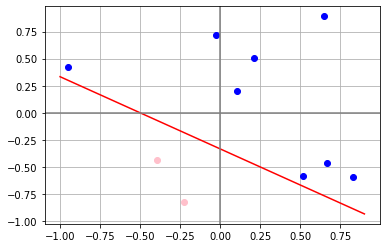

In [13]:
x = np.arange(-1,1,.1)
y = np.arange(-1,1,.1)

z = -(p.w[0]*x + p.w[2])/p.w[1]

plt.plot(x, z, color = "red")

for i in range(0, len(X_train)):
    
    if (Y_train[i] == 1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="blue")
        
    elif (Y_train[i] == -1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="pink")

plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')        

plt.show()

# Gerando nossa Hipótese inicial 

In [14]:
x = np.random.uniform(-1, 1)
y = np.random.uniform(-1, 1)
z = np.random.uniform(-1, 1)

g = Perceptron(x,y,z)

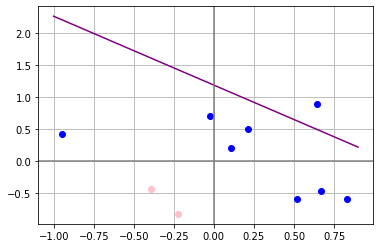

In [15]:
x = np.arange(-1,1,.1)
y = np.arange(-1,1,.1)

z = -(g.w[0]*x + g.w[2])/g.w[1]

plt.plot(x, z, color = "purple")

for i in range(0, len(X_train)):
    
    if (Y_train[i] == 1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="blue")
        
    elif (Y_train[i] == -1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="pink")

plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')        

plt.show()

# Ajsutando os pesos com base no erro 

In [16]:
G, acc = g.train(X_train, Y_train, epochs = 20)

80.00% de acuracia
90.00% de acuracia
100.00% de acuracia


# Plot da Hipotese final 

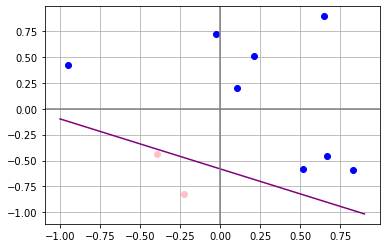

In [17]:
x = np.arange(-1,1,.1)
y = np.arange(-1,1,.1)

z = -(G[0]*x + G[2])/G[1]

for i in range(0, len(X_train)):
    
    if (Y_train[i] == 1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="blue")
        
    elif (Y_train[i] == -1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="pink")

plt.plot(x, z, color = "purple")
        
plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')        

plt.show()

In [18]:
print("{:.2f}% de acuracia".format(acc*100))

100.00% de acuracia
